<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddffee;border-radius:15px">Mini project: Sequences comparison using an alignment and free-alignment methods </p>

Influenza viruses are classified based on two surface proteins: hemagglutinin (H) and neuraminidase (N). These proteins determine the subtype of the virus, with 18 different hemagglutinin subtypes (H1-H18) and 11 different neuraminidase subtypes (N1-N11) identified so far. This classification helps in understanding the virus's behavior and in developing targeted vaccines.

We will consider neuraminidase (N) sequences from the avian influenza viruses. This project aims to compare the effectiveness of alignment and free-alignment approaches for sequences comparison. The letter N and H refers to neuraminidase and hemagglutinin type respectively.

<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddffee;border-radius:15px">1. Neuraminidase sequences </p>

Download sequences and IDs from $influenza\_viruses$ FASTA file and save them into two lists. Convert nucleotides to upper case. 

In [1]:
from Bio import SeqIO

IDS = []
sequences = []

with open('influenza_viruses', 'r') as f:
    for line in f:  
        line = line.rstrip() 
        if line.startswith('>'):
            IDS.append(line[1:])
        else:
            sequences.append(line.upper())

print(f"Number of IDs stored: {len(IDS)}")
print(f"Number of sequences stored: {len(sequences)}")


Number of IDs stored: 38
Number of sequences stored: 38


To perform steps 2,3 and 4 I recommend creating three separate scripts named: step2.py, step3.py and step4.py in which you append all necessary functions and variables.  <br>

- step2.py should contain: DNA dictionary (points for matches and mismatches), SequenceAlign, Profile, ProfileAlign, and the main functions: ProfileMultipleAlignment, Score, SimMatrix
- step3.py should contain: kmers, k_comparison, MerMatrix
- step4.py should contain: WordSeq, words_comparison, LZMatrix

<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddffee;border-radius:15px">2. Multiple Sequence Alignment (MSA)  </p>

In [2]:
import step2
print(dir(step2))

['DNA_dict', 'Profile', 'ProfileAlign', 'ProfileMultipleAlignment', 'Score', 'SequenceAlign', 'SimMatrix', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'np']


In [12]:
#Import all the libraries
from step2 import DNA_dict, SequenceAlign, Profile, ProfileAlign, ProfileMultipleAlignment, Score, SimMatrix
import numpy as np
import pandas as pd


Use ProfileMultipleAlignment function to perform the MSA. Put the following points:
- match (2), mismatch (-2) (DNA_2 dictionary)
- gap insertion/gap extension (4)

Save it to an $align$ variable. 

Use SimMatrix to compare aligned sequences.

Build a UPGMA tree and plot it. Make a comment on it. Whether viruses are clustered appropriately?

In [4]:
DNA_2 = {
    'G': {'G': 2, 'C': -2, 'A': -2, 'T': -2, 'N': -2, '-': -4},
    'C': {'G': -2, 'C': 2, 'A': -2, 'T': -2, 'N': -2, '-': -4},
    'A': {'G': -2, 'C': -2, 'A': 2, 'T': -2, 'N': -2, '-': -4},
    'T': {'G': -2, 'C': -2, 'A': -2, 'T': 2, 'N': -2, '-': -4},
    'N': {'G': -2, 'C': -2, 'A': -2, 'T': -2, 'N': 2, '-': -4},
    '-': {'G': -4, 'C': -4, 'A': -4, 'T': -4, 'N': -4, '-': -4}
}

aligned_sequences = ProfileMultipleAlignment(sequences, similarityMatrix=DNA_2)

for seq in aligned_sequences:
    print(seq)


----AATGAATCCAAACCAAAAGATAATAACCATTGGTTCGGTCTGTATGACAATTGGAATGGCTAACT-TAATATTACAAATTGGAAACATAATCTCAATATGGATTAGCCACTCAATTCAACTTGGGAATCAA-AATCAGATTGAAACATGCAATCAAAGCGTCATTACTTATGAAAACAACACTTGGGTAAATCAGACATATGTTAACATCAGCAACACCAACTTTGCTGCTGGACAGTCAGTGGTTTCCGTGAAATTAGCGGGCAATTCCTCTCTCTGCCCTGTTAGTGGATGGGCTATATACAGTAAAGACAACAGTATAAGAATCGGTTCCAAGGGGGATGTGTTTGTCATAAGGGAACCATTCATATCATGCTCCCCCTTGGAATGCAGAACCTTCTTCTTGACTCAAGGGGCCTTGCTAAATGACAAACATTCCAATGGAACCATTAAAGACAGGAGCCCATATCGAACCCTAATGAGCTGTCCTATTGGTGAAGTTCCCTCTCCATACAACTCAAGATTTGAGTCAGTCGCTTGGTCAGCAAGTGCTTGTCATGATGGCATCAATTGGCTAACAATTGGAATTTCTGGCCCAGACAATGGGGCAGTGGCTGTGTTAAAGTACAACGGCATAATAACAGACACTATCAAGAGTTGGAGAAACAATATATTGAGAACACAAGAGTCTGAATGTGCATGTGTAAATGGTTCTTGCTTTACTGTAATGACCGATGGACCAAGTGATGGACAGGCCTCATACAAGATCTTCAGAATAGAAAAGGGAAAGATAGTCAAATCAGTCGAAATGAATGCCCCTAATTATCACTATGAGGAATGCTCCTGTTATCCTGATTCTAGTGAAATCACATGTGTGTGCAGGGATAACTGGCATGGCTCGAATCGACCGTGGGTGTCTTTCAACCAGAATCTGGAATATCAGATAGGATACATATGCAGTGGGATTTTCGGAGACAATCCACGCCCTAATGATAAG

In [10]:
similarity_matrix = SimMatrix(aligned_sequences, DNA_2)
df_similarity_matrix = pd.DataFrame(similarity_matrix)
df_similarity_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,404.0,434.0,-3236.0,-2916.0,518.0,-2936.0,-2932.0,-2884.0,-2864.0,...,-3538.0,-3272.0,-3062.0,-2990.0,-3916.0,-3190.0,-3326.0,-3096.0,-3348.0,-3312.0
1,404.0,0.0,1268.0,-3132.0,-2952.0,542.0,-2944.0,-2952.0,-2874.0,-2846.0,...,-3474.0,-3220.0,-3106.0,-3012.0,-3914.0,-3208.0,-3290.0,-3120.0,-3334.0,-3266.0
2,434.0,1268.0,0.0,-3156.0,-2958.0,572.0,-2956.0,-2964.0,-2838.0,-2810.0,...,-3426.0,-3174.0,-3052.0,-2964.0,-3862.0,-3182.0,-3242.0,-3032.0,-3280.0,-3202.0
3,-3236.0,-3132.0,-3156.0,0.0,-3116.0,-3124.0,-3144.0,-3120.0,-2998.0,-3128.0,...,-3492.0,-3358.0,-3308.0,-3380.0,-4114.0,-3260.0,-3370.0,-3406.0,-3484.0,-3394.0
4,-2916.0,-2952.0,-2958.0,-3116.0,0.0,-2960.0,886.0,842.0,-3096.0,-3044.0,...,-3540.0,-3152.0,-3090.0,-3218.0,-3904.0,-3210.0,-3304.0,-3260.0,-3324.0,-3388.0


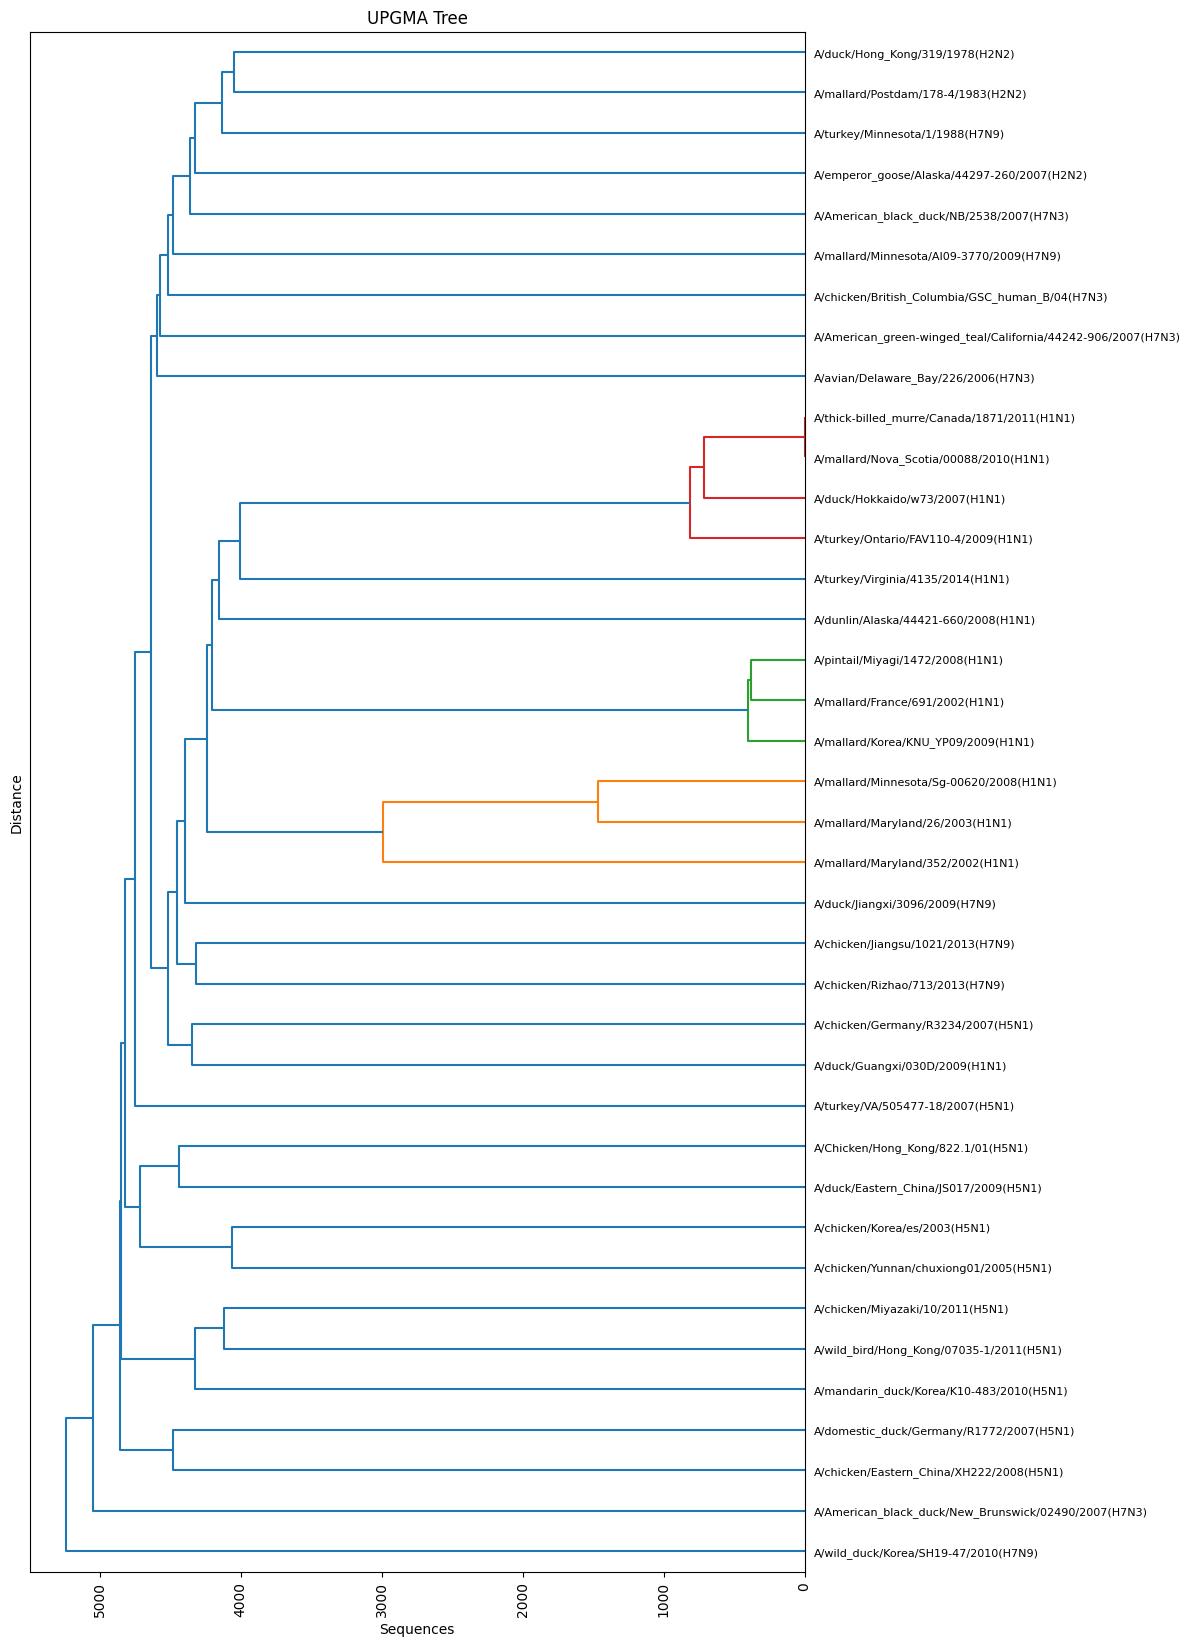

In [13]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

max_similarity = np.max(similarity_matrix)
distance_matrix = max_similarity - similarity_matrix
np.fill_diagonal(distance_matrix, 0)

condensed_distance_matrix = sch.distance.squareform(distance_matrix)

# Perform hierarchical clustering using UPGMA method (average linkage)
Z = sch.linkage(condensed_distance_matrix, method='average')

plt.figure(figsize=(10, 20))
dendrogram = sch.dendrogram(Z, labels=IDS, orientation='left')
plt.title('UPGMA Tree')
plt.xlabel('Sequences')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()


Comment:
The observations from UPGMA tree suggest that the viruses are clustered appropriately, by capturing their genetic similarities.

<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddffee;border-radius:15px">3. K-mers </p>

In [14]:
from step3 import kmers, k_comparison, MerMatrix

Use MerMatrix function (with k=3) to compare viruses sequences and use this matrix to construct a phylogenetic tree (UPGMA method). Plot a tree and make a comment on it.

Try other k parameter values - for example: 5, 7, 10. How does it impact the final tree?

In [17]:
def plot_phylogenetic_tree(similarity_matrix, ids, title="Phylogenetic Tree"):
    max_similarity = np.max(similarity_matrix)
    distance_matrix = max_similarity - similarity_matrix
    np.fill_diagonal(distance_matrix, 0)

    condensed_distance_matrix = sch.distance.squareform(distance_matrix)

    Z = sch.linkage(condensed_distance_matrix, method='average')

    plt.figure(figsize=(10, 7))
    dendrogram = sch.dendrogram(Z, labels=ids, orientation='left')
    plt.title(title)
    plt.xlabel('Sequences')
    plt.ylabel('Distance')
    plt.xticks(rotation=90)
    plt.show()


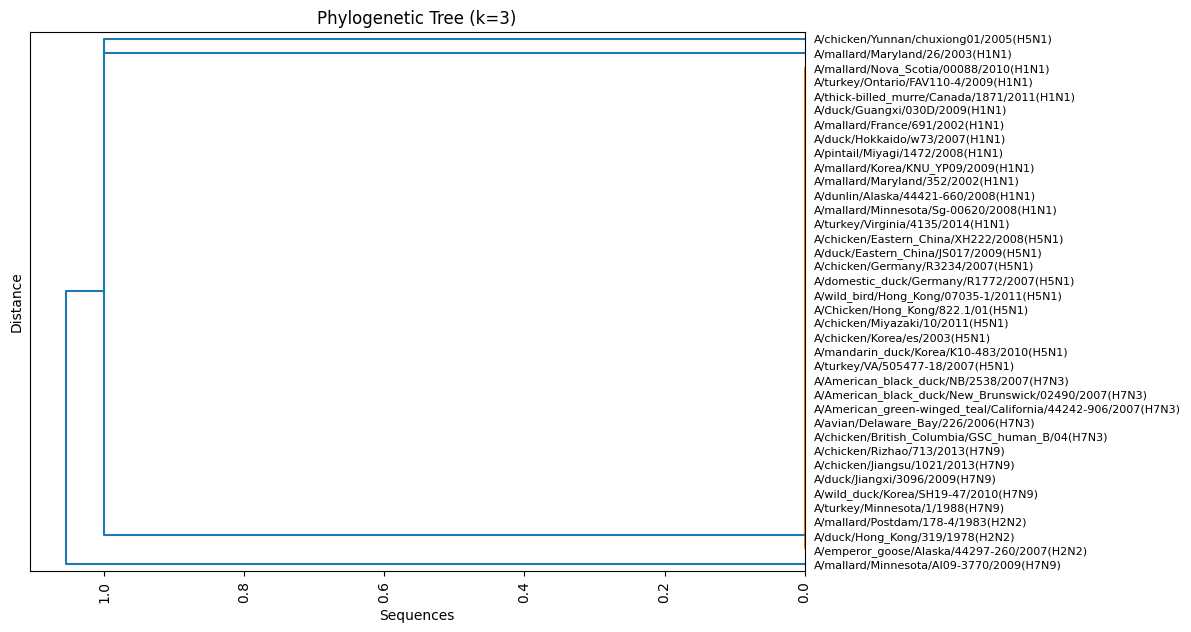

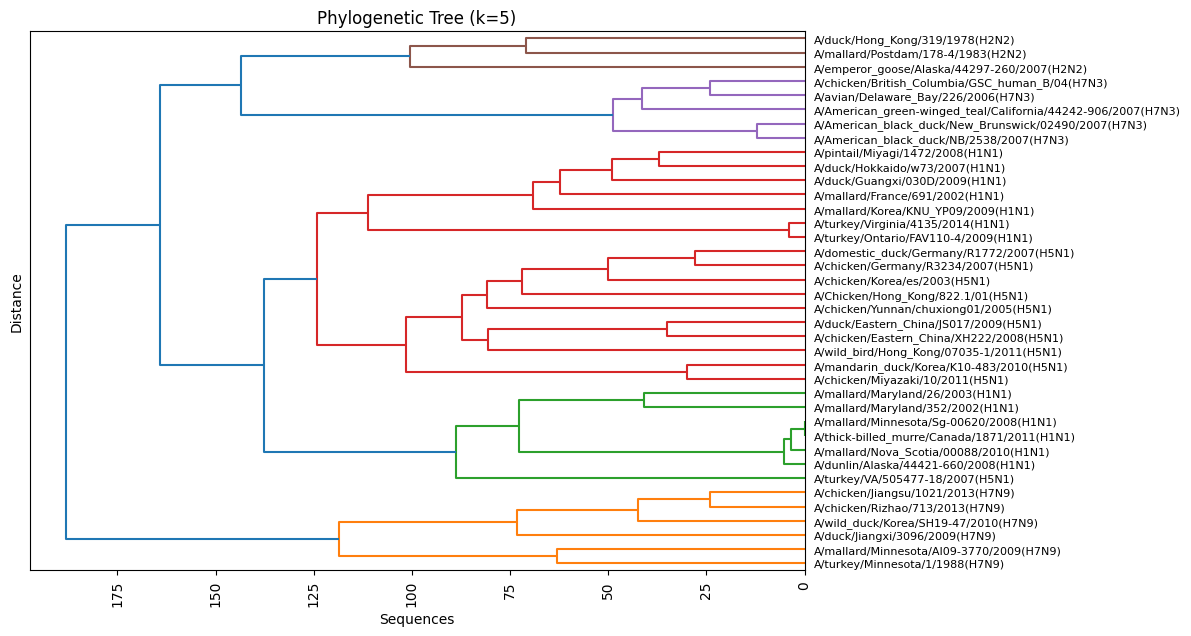

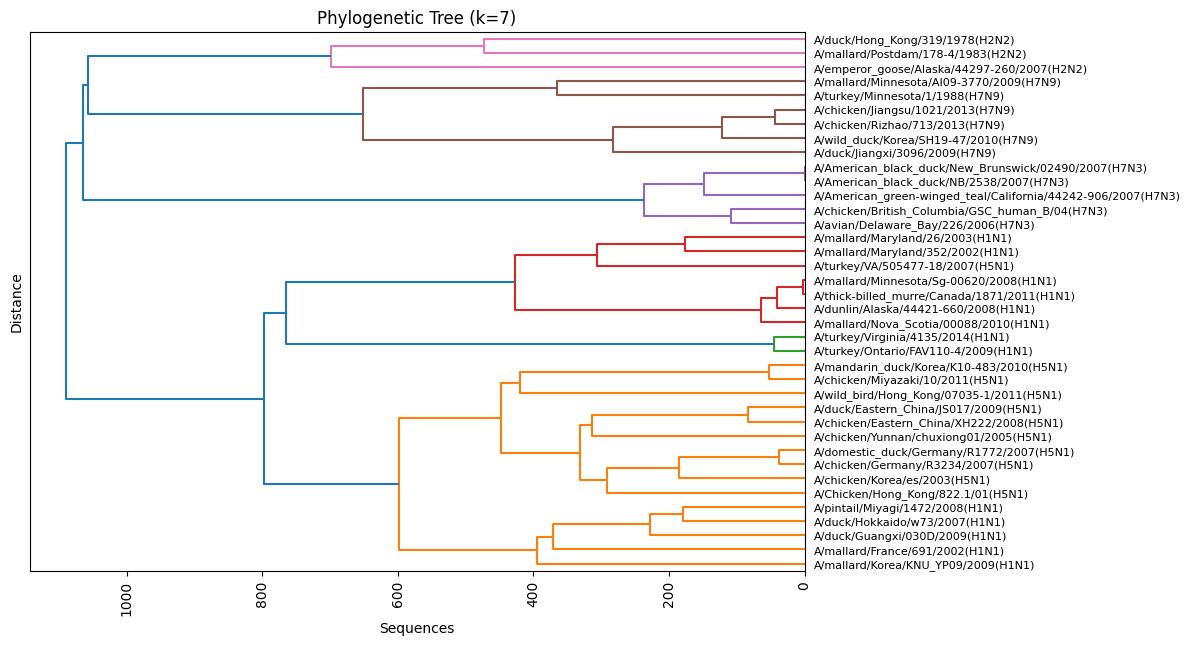

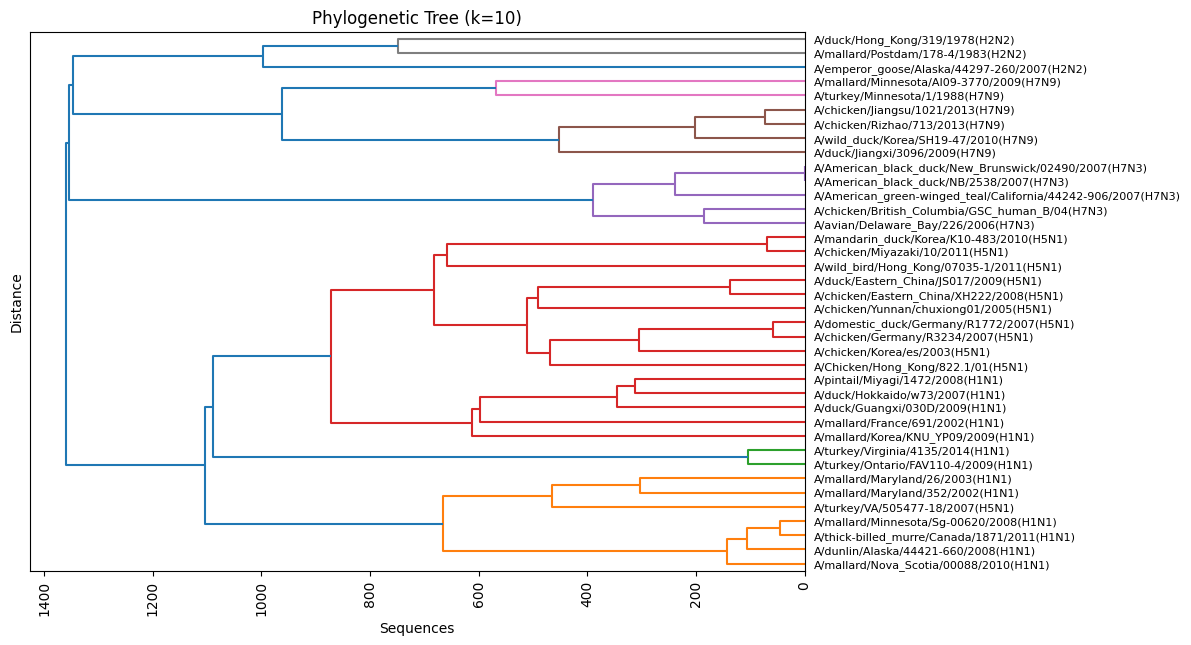

In [18]:
k_values = [3, 5, 7, 10]
for k in k_values:
    similarity_matrix = MerMatrix(sequences, k)
    df_similarity_matrix = pd.DataFrame(similarity_matrix)
    
    # Plot phylogenetic tree
    plot_phylogenetic_tree(similarity_matrix, IDS, title=f"Phylogenetic Tree (k={k})")

<h4>Comment:
The clustering and distances can vary based on the value of k. Typically, smaller k values capture more local sequence features, while larger k values capture more global features.

<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddffee;border-radius:15px">4. Lempel-Ziv Complexity </p>

In [19]:
from step4 import WordSeq, words_comparison, LZMatrix

Use LZMatrix function to compare viruses sequences and use this matrix to construct a phylogenetic tree (UPGMA method). Plot a tree and make a comment on it.

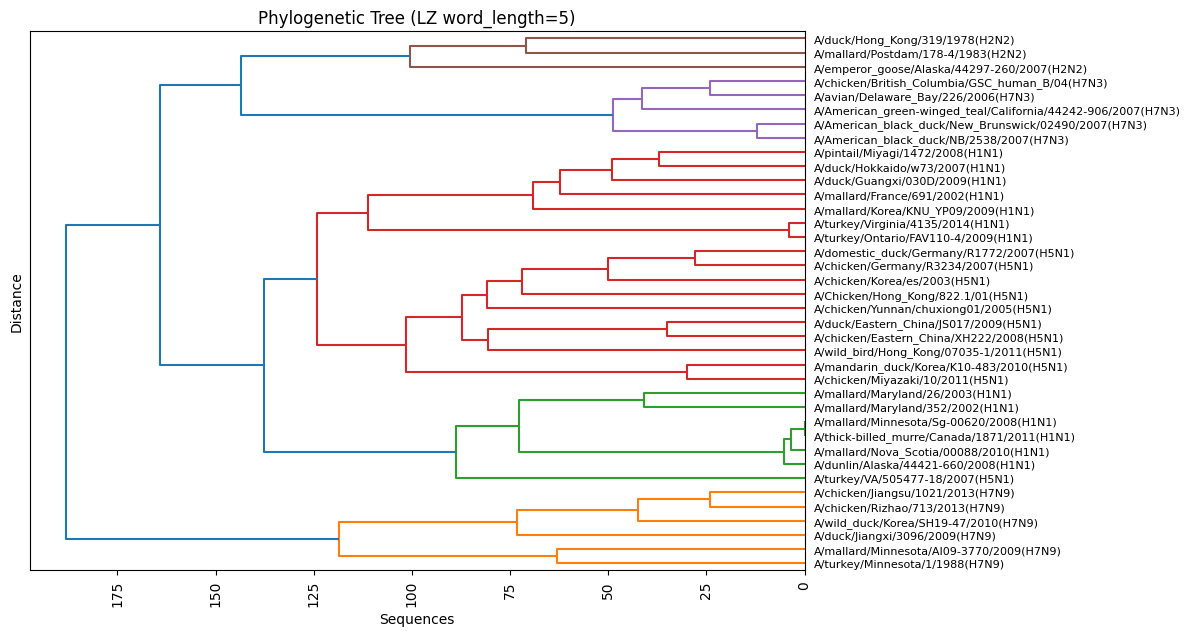

In [20]:
word_length = 5
similarity_matrix = LZMatrix(sequences, word_length)
df_similarity_matrix = pd.DataFrame(similarity_matrix)

# Plot phylogenetic tree
plot_phylogenetic_tree(similarity_matrix, IDS, title=f"Phylogenetic Tree (LZ word_length={word_length})")


<h4>Comment:
The clustering and distances reflect the Lempel-Ziv complexity of the sequences. This method captures sequence similarities based on repeated patterns and compressibility.

<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddffee;border-radius:15px">5. Time consumption </p>

Run code from steps 2, 3 and 4 once again but this time measure the time needed to perform calculations. Which method is the fastest, which the slowest? Below, there is an example of time measuring.

In [21]:
%%time

#############Your code here##########
x = [1,2]
N = 150000
for i in range(N):
    x.append(x[-1]+x[-2])
#####################################

CPU times: total: 2.55 s
Wall time: 3.36 s


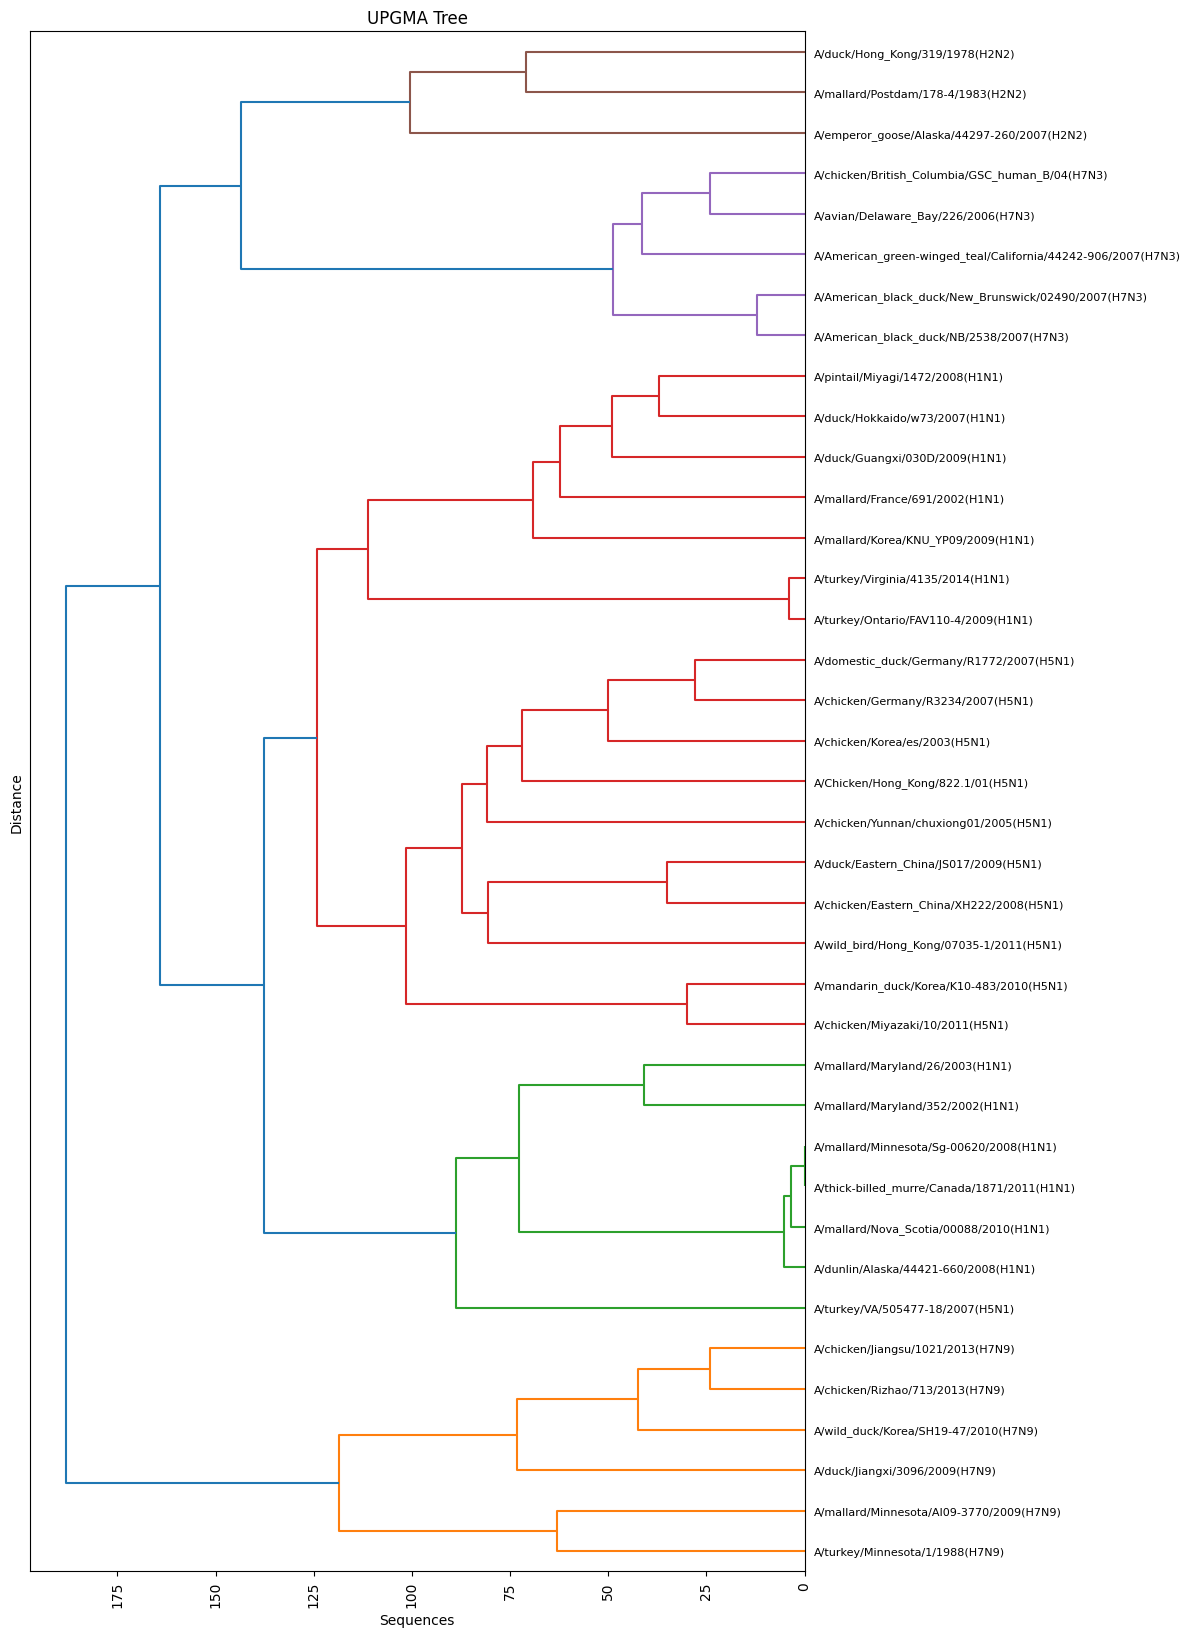

CPU times: total: 4.27 s
Wall time: 53.5 s


In [22]:
%%time
from step2 import DNA_dict, SequenceAlign, Profile, ProfileAlign, ProfileMultipleAlignment, Score, SimMatrix

max_similarity = np.max(similarity_matrix)
distance_matrix = max_similarity - similarity_matrix
np.fill_diagonal(distance_matrix, 0)

condensed_distance_matrix = sch.distance.squareform(distance_matrix)

# Perform hierarchical clustering using UPGMA method (average linkage)
Z = sch.linkage(condensed_distance_matrix, method='average')

plt.figure(figsize=(10, 20))
dendrogram = sch.dendrogram(Z, labels=IDS, orientation='left')
plt.title('UPGMA Tree')
plt.xlabel('Sequences')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

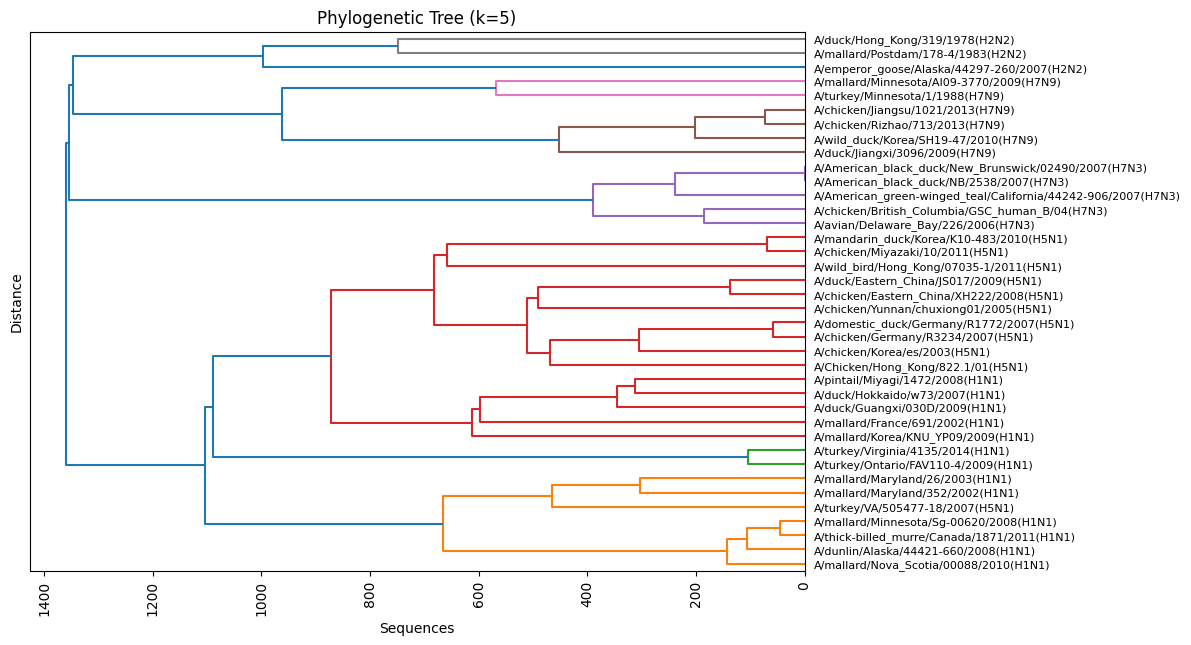

CPU times: total: 1.44 s
Wall time: 9.13 s


In [23]:
%%time

def plot_phylogenetic_tree(similarity_matrix, ids, title="Phylogenetic Tree"):
    max_similarity = np.max(similarity_matrix)
    distance_matrix = max_similarity - similarity_matrix
    np.fill_diagonal(distance_matrix, 0)

    condensed_distance_matrix = sch.distance.squareform(distance_matrix)

    Z = sch.linkage(condensed_distance_matrix, method='average')

    plt.figure(figsize=(10, 7))
    dendrogram = sch.dendrogram(Z, labels=ids, orientation='left')
    plt.title(title)
    plt.xlabel('Sequences')
    plt.ylabel('Distance')
    plt.xticks(rotation=90)
    plt.show()

k_values = 5
similarity_matrix = MerMatrix(sequences, k)
df_similarity_matrix = pd.DataFrame(similarity_matrix)
    
# Plot phylogenetic tree
plot_phylogenetic_tree(similarity_matrix, IDS, title=f"Phylogenetic Tree (k={k_values})")

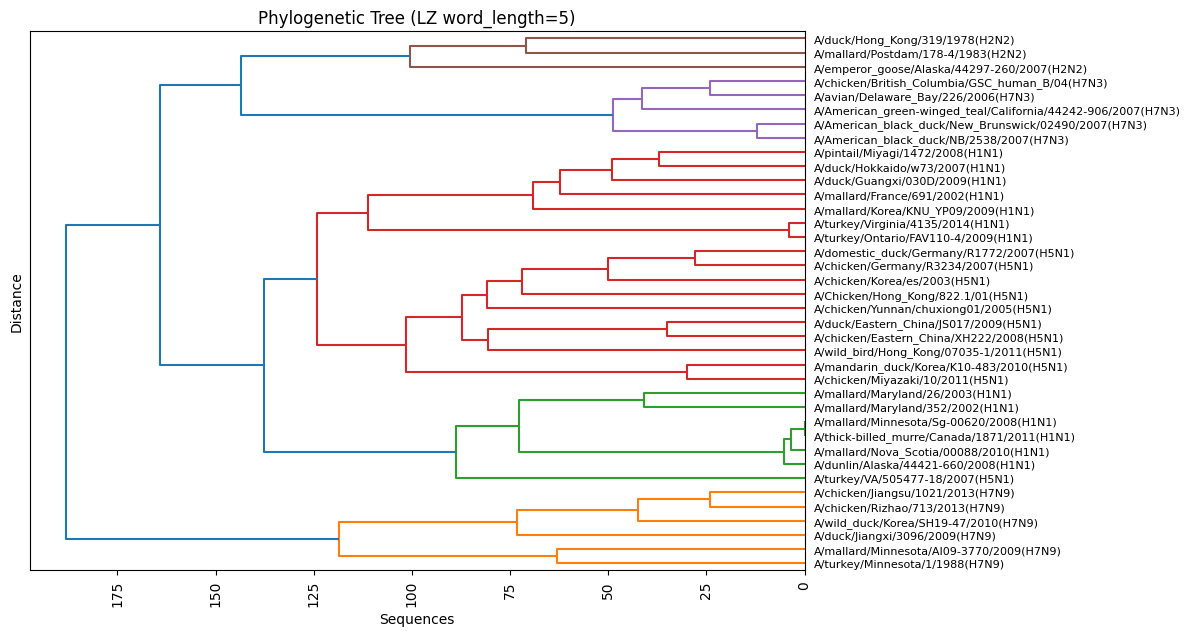

CPU times: total: 1.28 s
Wall time: 2.97 s


In [24]:
%%time

word_length = 5
similarity_matrix = LZMatrix(sequences, word_length)
df_similarity_matrix = pd.DataFrame(similarity_matrix)

# Plot phylogenetic tree
plot_phylogenetic_tree(similarity_matrix, IDS, title=f"Phylogenetic Tree (LZ word_length={word_length})")


<h3>   Comment: Step 3 (k-mers) is the fastest method, while step 2 (MSA) is the slowest.

<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddffee;border-radius:15px">6. New sequence classification </p>

Consider a query sequence:

In [25]:
query_sequence = "AGCAAAAGCAGGAGTTCAAAATGAATCCAAATCAAAAGATAATAACCATTGGGTCAATTTGTATGGTAATTGGAATAGCCAGTTTGATGTTACAAATTGGGAACATGATTTCAATATGGGTTAGCCATTCAATTCAGACAGGGAATCAATACCAGCCTGAACCATGCAACCAAAGCATCATCACTTATGAAAACAACACCTGGGTAAATCAGACGTATGTCAACATTAGCAATACAAATTTTCTTACTGAACAGGCTGTAACTTCGGTGGCATTAGCGGGCAATTCATCTCTTTGCCCTATTAGTGGATGGGCTATATACAGTAAGGATAACGGTATAAGAATTGGTTCCAAGGGGGATGTATTTGTTATAAGAGAACCATTCATCTCATGCTCCCACTTGGAATGCAGAACCTTCTTTTTAACTCAGGGAGCTCTGTTGAATGACAAGCATTCTAATGGAACCGTCAAAGATAGAAGCCCTTACAGAACCTTGATGAGTTGTCCCGTGGGTGAGGCTCCTTCCCCATATAACTCAAGGTTTGAGTCTGTTGCTTGGTCGGCAAGTGCTTGTCATGATGGCATCAGTTGGTTGACAATTGGAGTTTCTGGTCCAGACAATGGGGCTGTGGCTGTATTGAAATACAATGGCATAATAACGGACACTATCAAGAGTTGGAGGAACGACATTTTGAGAACCCAAGAATCTGAATGTGCATGTGTAAATGGTTCTTGCTTTACTGTAATGACCGATGGACCAAGTAATGGGCAGGCCTCATATAAGATCTTCAAGATAGAGAAAGGAAAAGTAGTCAAATCAGTTGAATTGAATGCCCCTAATTATCACTATGAGGAATGCTCCTGCTATCCTGATGCAGGCGAAATCATGTGTGTGTGCAGGGATAACTGGCATGGCTCGAATCGGCCGTGGGTATCTTTCAATCAAAATCTGGAGTATCGAATAGGATATATATGCAGTGGAGTTTTCGGAGACAATCCACGCCCCAATGATGGAACAGGCAGTTGCGGTCCGGTGTCCTCTAACGGGGCATATGGAGTAAAAGGGTTTTCATTTAAATACGGCAATGGTGTTTGGATCGGAAGAACAAAAAGCACTAGTTCCAGAAGCGGCTTTGAGATGATTTGGGATCCGAATGGGTGGACTGAAACGGACAGTAGCTTCTCAGTGAAGCAAGACATCGTAGCAATAACTGACTGGTCAGGATATAGTGGGAGTTTTGTCCAGCATCCAGAACTGACAGGATTAGATTGCATGAGACCTTGTTTCTGGGTTGAGCTAATCAGAGGGCGGCCCAAAGAGAATACAATTTGGACTAGTGGGAGCAGCATATCCTTTTGTGGTGTAGATAGTGACACTGTGGGTTGGTCTTGGCCAGACGGTGCTGAGTTGCCATTCACCATTGACAAGTAGTTTGTTCAAAAAACTCCTTGTTTCTACT"

Using alignment or free-alignment methods try to classify it by assigning appropriate group. For this purpose, write a Python code below. Additionally, you may build a phylogentic tree (for a query and all viruses sequences from the file) to approve your presumptions.

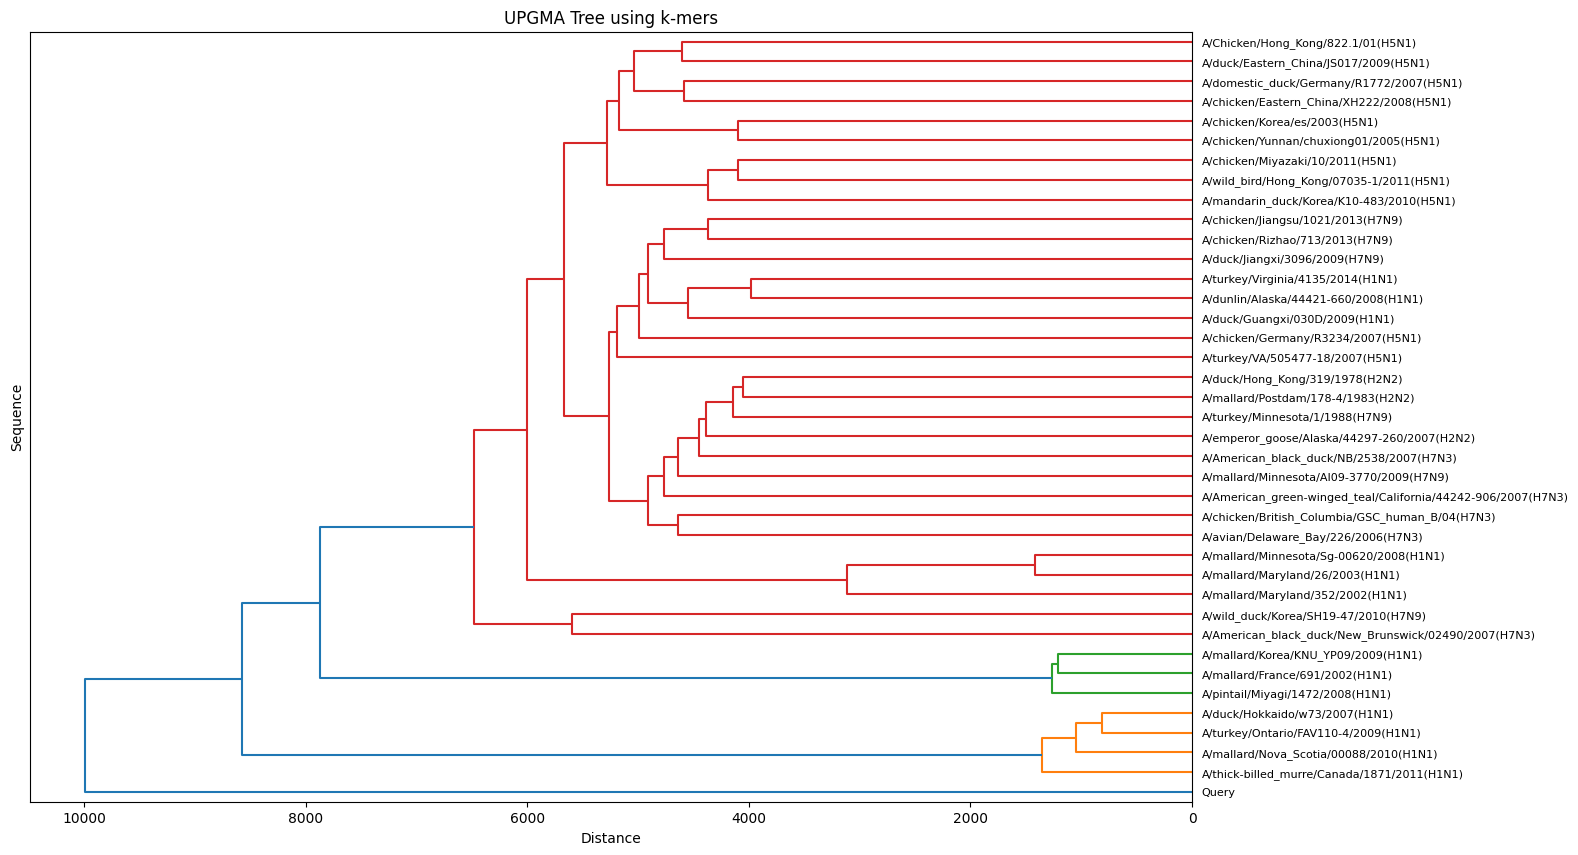

In [26]:
alignment_result = ProfileMultipleAlignment(sequences, similarityMatrix=DNA_dict)
aligned_sequences = ["".join(seq) for seq in alignment_result]

aligned_sequences.append(query_sequence)
IDS.append("Query")

similarity_matrix = SimMatrix(aligned_sequences, DNA_dict)

def build_upgma_tree(matrix, ids, title):
    dist_matrix = np.zeros((len(ids), len(ids)))
    for i in range(len(ids)):
        for j in range(i + 1, len(ids)):
            dist_matrix[i][j] = dist_matrix[j][i] = matrix[i][j]

    # Build the tree using the UPGMA method
    from scipy.cluster.hierarchy import linkage, dendrogram
    linked = linkage(dist_matrix, method='average')
    
    # Plot the tree
    plt.figure(figsize=(15, 10))
    dendrogram(linked, labels=ids, orientation='left')
    plt.title(title)
    plt.xlabel('Distance')
    plt.ylabel('Sequence')
    plt.show()

build_upgma_tree(similarity_matrix, IDS, "UPGMA Tree using k-mers")


<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddffee;border-radius:15px">7. H5N1 viruses and 20 aa deletion </p>

It appears that many H5N1 subtype viruses posses a characterisitc 60 nt (20 aa) deletion which causes
higher virulence of these viruses. Download neuraminidase protein sequences for A/mandarin_duck/Korea/K10-483/2010(H5N1) [ID: JF699677.1] and A/duck/Hokkaido/w73/2007(H1N1) [ID: AB470663.1] from Nucleotide database finding an appropriate tag (via Python/eutils). Plot a dot matrix and localise this deletion. 

In [27]:
import requests
from Bio import SeqIO
from io import StringIO

def fetch_sequence(id):
    url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nucleotide&id={id}&rettype=fasta&retmode=text"
    response = requests.get(url)
    return response.text

seq1_id = "JF699677.1"
seq2_id = "AB470663.1"

seq1_fasta = fetch_sequence(seq1_id)
seq2_fasta = fetch_sequence(seq2_id)

# Parse the FASTA sequences using StringIO
seq1_record = SeqIO.read(StringIO(seq1_fasta), "fasta")
seq2_record = SeqIO.read(StringIO(seq2_fasta), "fasta")

# print(f"Sequence 1 ID: {seq1_record.id}")
# print(f"Sequence 1 Description: {seq1_record.description}")
# print(f"Sequence 1 Sequence: {seq1_record.seq}")

# print(f"Sequence 2 ID: {seq2_record.id}")
# print(f"Sequence 2 Description: {seq2_record.description}")
# print(f"Sequence 2 Sequence: {seq2_record.seq}")


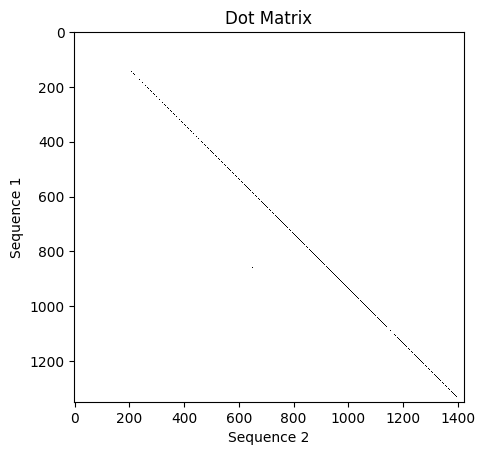

In [33]:
def dot_matrix(seq1, seq2, window, threshold):
    len1, len2 = len(seq1), len(seq2)
    matrix = np.zeros((len1, len2), int)
    
    for i in range(len1 - window):
        for j in range(len2 - window):
            window_seq1 = seq1[i:i+window]
            window_seq2 = seq2[j:j+window]
            matches = sum(1 for a, b in zip(window_seq1, window_seq2) if a == b)
            if matches >= threshold:
                matrix[i, j] = 1
    
    plt.imshow(matrix, cmap='Greys', interpolation='nearest')
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')
    plt.title('Dot Matrix')
    plt.show()

# Convert sequences to strings
seq1 = str(seq1_record.seq)
seq2 = str(seq2_record.seq)

dot_matrix(seq1, seq2, window=20, threshold=15)


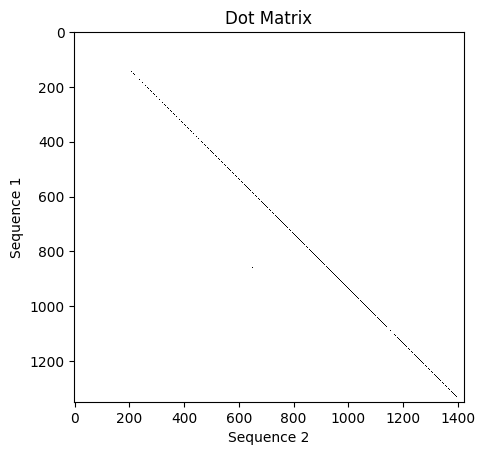

In [35]:
def dot_matrix(seq1, seq2, window, threshold):
    len1, len2 = len(seq1), len(seq2)
    matrix = np.zeros((len1, len2), int)
    
    # loop ranges to include all possible starting positions
    for i in range(len1 - window + 1):
        for j in range(len2 - window + 1):
            window_seq1 = seq1[i:i+window]
            window_seq2 = seq2[j:j+window]
            matches = sum(1 for a, b in zip(window_seq1, window_seq2) if a == b)
            if matches >= threshold:
                matrix[i, j] = 1  # Mark the starting position of the window
    
    plt.imshow(matrix, cmap='Greys', interpolation='nearest')
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')
    plt.title('Dot Matrix')
    plt.show()

# Convert sequences to strings
seq1 = str(seq1_record.seq)
seq2 = str(seq2_record.seq)

dot_matrix(seq1, seq2, window=20, threshold=15)

<p style="font-size:15pt;font-weight:bold;border:1px solid;border-color:#aabbcc;padding:15px;background:#ddffee;border-radius:15px">8. Neuraminidase inhibitors </p>

There are many drugs classified as neuraminidase inhibitors (NAIs) and one of them is zanamivir. Download the zanamivir SMILES structure from the Pubchem database and plot it. 

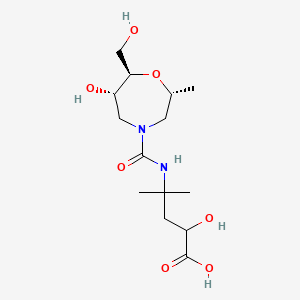

In [36]:
from urllib.request import urlretrieve
from IPython.display import Image  

zanamivir_smiles = 'C[C@@H]1CN(C[C@H](O)[C@H](O1)CO)C(=O)NC(C)(C)CC(C(=O)O)O'

url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/{zanamivir_smiles}/PNG'

urlretrieve(url, 'zanamivir.png')

Image(filename='zanamivir.png')
